In [1]:
import numpy as np
from matplotlib import pyplot as plt
import os
from skimage.io import imread_collection
from skimage import data, img_as_float, io, exposure
import matplotlib
from natsort import natsorted, ns
import warnings
warnings.simplefilter("ignore")

In [5]:
from sklearn.model_selection import train_test_split
import pandas as pd
# train_names = [f for f in os.listdir("train_v2")]
train_names = [f for f in os.listdir("train_v2")]
tr_n, val_n = train_test_split(train_names, test_size=0.05, random_state=42)

# segmentation_df = pd.read_csv(os.path.join('./', './train_ship_segmentations_v2.csv'))
segmentation_df = pd.read_csv(os.path.join('./', 'train_ship_segmentations_v2.csv'))

In [12]:

trainAllImages = set()
# for i in range(len(segmentation_df)):
#     temp = segmentation_df.loc[i]["EncodedPixels"]
#     if(type(temp)==str):
#         trainAllImages.append(segmentation_df.loc[i]["ImageId"])
# print(trainAllImages[0])
imgName = []
encodedPixel = set()
import math
# newSeg = pd.read_csv(os.path.join(PATH, SEGMENTATION))
# print(newSeg.iloc[0]['ImageId'])
# segDict = dict()
# print(newSeg.head)
for i in range(len(segmentation_df)):
    temp = segmentation_df.iloc[i]['EncodedPixels']
    # print(temp)
    if(type(temp)==str):
        trainAllImages.add(segmentation_df.iloc[i]['ImageId'])
#         imgName.append(segmentation_df.iloc[i]['ImageId'])
#         encodedPixel.add(segmentation_df.iloc[i]['EncodedPixels'])
print(len(imgName))
print(len(encodedPixel))


0
0


In [17]:
for i in trainAllImages:
    temp = segmentation_df['EncodedPixels'].where(segmentation_df['ImageId'] == i)
    print(temp)
    break

0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
         ... 
231718    NaN
231719    NaN
231720    NaN
231721    NaN
231722    NaN
Name: EncodedPixels, Length: 231723, dtype: object


In [18]:
segmentation_df.head()

ImageId                                      EncodedPixels
0  00003e153.jpg                                                NaN
1  0001124c7.jpg                                                NaN
2  000155de5.jpg  264661 17 265429 33 266197 33 266965 33 267733...
3  000194a2d.jpg  360486 1 361252 4 362019 5 362785 8 363552 10 ...
4  000194a2d.jpg  51834 9 52602 9 53370 9 54138 9 54906 9 55674 ...

In [20]:
temp = segmentation_df['EncodedPixels'].where(segmentation_df['ImageId'] == '000155de5.jpg')
print(type(temp))

<class 'pandas.core.series.Series'>


In [40]:
segmentation_df = pd.read_csv(os.path.join('./', 'train_ship_segmentations_v2.csv'))
trainAllImages = set()
imageNames=[]
encodedPixels = []
for i in range(len(segmentation_df)):
    temp = segmentation_df.iloc[i]['EncodedPixels']
    if(type(temp)==str):
        imageNames.append(segmentation_df.iloc[i]['ImageId'])
        encodedPixels.append(segmentation_df.iloc[i]['EncodedPixels'])
#     break
#     if(type(temp)==str):
#         trainAllImages.add(segmentation_df.iloc[i]['ImageId'])
# print(len(trainAllImages))

In [41]:
print(len(imageNames))

81723


In [38]:
print(len(encodedPixels))

81723


In [39]:
print(i)

231722


In [42]:
s = set(imageNames)
print(len(s))

42556


In [43]:
s1 = set(encodedPixels)
print(len(s1))

81722


In [44]:
finalDataFrame = pd.DataFrame(imageNames,columns=['ImageId'])
finalDataFrame['EncodedPixels'] = encodedPixels

In [45]:
finalDataFrame.shape

(81723, 2)

In [46]:
finalDataFrame.head()

ImageId                                      EncodedPixels
0  000155de5.jpg  264661 17 265429 33 266197 33 266965 33 267733...
1  000194a2d.jpg  360486 1 361252 4 362019 5 362785 8 363552 10 ...
2  000194a2d.jpg  51834 9 52602 9 53370 9 54138 9 54906 9 55674 ...
3  000194a2d.jpg  198320 10 199088 10 199856 10 200624 10 201392...
4  000194a2d.jpg  55683 1 56451 1 57219 1 57987 1 58755 1 59523 ...

In [53]:
countShips = []
for i in s:
    countTemp = imageNames.count(i)
    countShips.append(countTemp)

In [54]:
print(countShips)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 2, 2, 1, 3, 1, 1, 2, 1, 4, 1, 1, 7, 1, 4, 3, 1, 3, 1, 1, 1, 1, 3, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 3, 8, 1, 1, 1, 1, 2, 1, 1, 10, 2, 1, 3, 1, 1, 1, 6, 1, 6, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 6, 1, 1, 1, 1, 1, 2, 4, 1, 3, 3, 5, 1, 1, 5, 1, 3, 6, 1, 1, 1, 1, 1, 1, 2, 2, 5, 2, 1, 1, 3, 8, 1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 4, 2, 3, 1, 1, 2, 2, 1, 3, 1, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 2, 1, 3, 1, 1, 1, 1, 1, 2, 2, 3, 2, 1, 1, 1, 3, 1, 2, 2, 1, 1, 1, 1, 2, 3, 2, 1, 4, 1, 1, 1, 1, 3, 1, 1, 4, 1, 7, 11, 1, 1, 1, 3, 1, 2, 1, 1, 1, 3, 8, 1, 3, 5, 7, 1, 1, 1, 1, 5, 1, 1, 1, 7, 2, 1, 1, 4, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 4, 1, 2, 3, 3, 1, 1, 1, 1, 1, 4, 2, 13, 1, 4, 1, 1, 1, 1, 1, 2, 1, 5, 2, 3, 2, 5, 1, 1, 1, 2, 1, 1, 5, 1, 1, 1, 2, 2, 1, 1, 11, 2, 4, 2, 1, 1, 7, 3, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 3, 4, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 3, 1, 1, 4, 1, 5, 1, 1, 4, 1, 1, 1, 11, 3, 1, 5, 2, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2

In [56]:
print(max(countShips))

15


In [57]:
finalCountShips = []
for i in countShips:
    for j in range(i):
        finalCountShips.append(j+1)

In [58]:
print(len(finalCountShips))

81723


In [59]:
finalDataFrame['Counts'] = finalCountShips

In [60]:
finalDataFrame.head()

ImageId                                      EncodedPixels  Counts
0  000155de5.jpg  264661 17 265429 33 266197 33 266965 33 267733...       1
1  000194a2d.jpg  360486 1 361252 4 362019 5 362785 8 363552 10 ...       1
2  000194a2d.jpg  51834 9 52602 9 53370 9 54138 9 54906 9 55674 ...       1
3  000194a2d.jpg  198320 10 199088 10 199856 10 200624 10 201392...       1
4  000194a2d.jpg  55683 1 56451 1 57219 1 57987 1 58755 1 59523 ...       1

In [61]:
all_df = pd.pivot_table(finalDataFrame, values='EncodedPixels', index='ImageId',columns='Counts', aggfunc=np.sum).astype(str)


In [62]:
all_df = all_df.reset_index()
all_df.columns = ['ImageId','Ship1','Ship2','Ship3','Ship4',  'Ship5','Ship6','Ship7','Ship8','Ship9','Ship10','Ship11','Ship12','Ship13','Ship14','Ship15']
all_df.head()

ImageId                                              Ship1  \
0  000155de5.jpg  264661 17 265429 33 266197 33 266965 33 267733...   
1  000194a2d.jpg  360486 1 361252 4 362019 5 362785 8 363552 10 ...   
2  00021ddc3.jpg  108287 1 109054 3 109821 4 110588 5 111356 5 1...   
3  0002756f7.jpg  255784 2 256552 4 257319 7 258087 9 258854 12 ...   
4  00031f145.jpg  340363 1 341129 4 341896 6 342663 7 343429 10 ...   

                                               Ship2  \
0                                                nan   
1                                                nan   
2  139644 2 140408 6 141174 9 141942 9 142711 6 1...   
3  248878 1 249645 4 250413 6 251180 9 251948 10 ...   
4                                                nan   

                                               Ship3 Ship4 Ship5 Ship6 Ship7  \
0                                                nan   nan   nan   nan   nan   
1                                                nan   nan   nan   nan   nan   
2  75972 3 76738 5 77506 5 78274 5 79042 6 79811 ...   nan   nan   nan   nan   
3                                                nan   nan   nan   nan   nan   
4                                                nan   nan   nan   nan   nan   

  Ship8 Ship9 Ship10 Ship11 Ship12 Ship13 Ship14 Ship15  
0   nan   nan    nan    nan    nan    nan    nan    nan  
1   nan   nan    nan    nan    nan    nan    nan    nan  
2   nan   nan    nan    nan    nan    nan    nan    nan  
3   nan   nan    nan    nan    nan    nan    nan    nan  
4   nan   nan    nan    nan    nan    nan    nan    nan

In [63]:
all_df.to_csv("prep_data.csv", index=False)


In [64]:
data = pd.read_csv("prep_data.csv")
data.head()

ImageId                                              Ship1  \
0  000155de5.jpg  264661 17 265429 33 266197 33 266965 33 267733...   
1  000194a2d.jpg  360486 1 361252 4 362019 5 362785 8 363552 10 ...   
2  00021ddc3.jpg  108287 1 109054 3 109821 4 110588 5 111356 5 1...   
3  0002756f7.jpg  255784 2 256552 4 257319 7 258087 9 258854 12 ...   
4  00031f145.jpg  340363 1 341129 4 341896 6 342663 7 343429 10 ...   

                                               Ship2  \
0                                                NaN   
1                                                NaN   
2  139644 2 140408 6 141174 9 141942 9 142711 6 1...   
3  248878 1 249645 4 250413 6 251180 9 251948 10 ...   
4                                                NaN   

                                               Ship3 Ship4 Ship5 Ship6 Ship7  \
0                                                NaN   NaN   NaN   NaN   NaN   
1                                                NaN   NaN   NaN   NaN   NaN   
2  75972 3 76738 5 77506 5 78274 5 79042 6 79811 ...   NaN   NaN   NaN   NaN   
3                                                NaN   NaN   NaN   NaN   NaN   
4                                                NaN   NaN   NaN   NaN   NaN   

  Ship8 Ship9 Ship10 Ship11 Ship12 Ship13 Ship14 Ship15  
0   NaN   NaN    NaN    NaN    NaN    NaN    NaN    NaN  
1   NaN   NaN    NaN    NaN    NaN    NaN    NaN    NaN  
2   NaN   NaN    NaN    NaN    NaN    NaN    NaN    NaN  
3   NaN   NaN    NaN    NaN    NaN    NaN    NaN    NaN  
4   NaN   NaN    NaN    NaN    NaN    NaN    NaN    NaN

In [65]:
data.fillna('', inplace=True)
data.head()


ImageId                                              Ship1  \
0  000155de5.jpg  264661 17 265429 33 266197 33 266965 33 267733...   
1  000194a2d.jpg  360486 1 361252 4 362019 5 362785 8 363552 10 ...   
2  00021ddc3.jpg  108287 1 109054 3 109821 4 110588 5 111356 5 1...   
3  0002756f7.jpg  255784 2 256552 4 257319 7 258087 9 258854 12 ...   
4  00031f145.jpg  340363 1 341129 4 341896 6 342663 7 343429 10 ...   

                                               Ship2  \
0                                                      
1                                                      
2  139644 2 140408 6 141174 9 141942 9 142711 6 1...   
3  248878 1 249645 4 250413 6 251180 9 251948 10 ...   
4                                                      

                                               Ship3 Ship4 Ship5 Ship6 Ship7  \
0                                                                              
1                                                                              
2  75972 3 76738 5 77506 5 78274 5 79042 6 79811 ...                           
3                                                                              
4                                                                              

  Ship8 Ship9 Ship10 Ship11 Ship12 Ship13 Ship14 Ship15  
0                                                        
1                                                        
2                                                        
3                                                        
4

In [66]:
from sklearn.model_selection import train_test_split
train_data, cv_data = train_test_split(data, test_size=0.15, random_state=42)
print(train_data.shape)
print(cv_data.shape)

(36172, 16)
(6384, 16)


In [69]:
def rle2mask(rle):
    # CONVERT RLE TO MASK 
    if (pd.isnull(rle))|(rle==''): 
        return np.zeros((128,800) ,dtype=np.uint8)
    
    height= 128
    width = 128
    mask= np.zeros( width*height ,dtype=np.uint8)

    array = np.asarray([int(x) for x in rle.split()])
    starts = array[0::2]-1
    lengths = array[1::2]    
    for index, start in enumerate(starts):
        mask[int(start):int(start+lengths[index])] = 1
    
    return mask.reshape( (height,width), order='F' )[::2,::2]


# to convert masks to run length encoded values
def mask2rle(img):
    '''
    img: numpy array containing ones and zeros as pixel values, 1 - mask, 0 - background
    Returns String run length ecoded pixels 
    '''
    pixels= img.T.flatten() # Convert nd-array to 1d-array (numbering of pixels is from top to bottom)
    pixels = np.concatenate([[0], pixels, [0]]) # Adding zeros at the start and end so that if there's mask at the first/last pixel, it gets detected.
    runs = np.where(pixels[1:] != pixels[:-1])[0] + 1 # Detect all changing pixels (where pixel values changes, either 0 -> 1 or 1 -> 0)
    
    # To get RLE, we need start pixels and run lengths
    # Start pixels are the pixels where change 0 -> 1 occurs, i.e. pixels at even indices
    # Run length is the pixel distance between two consecutive changing pixels. So, run lengths = odd indices - even indices
    runs[1::2] -= runs[::2] 

    return ' '.join(str(x) for x in runs)

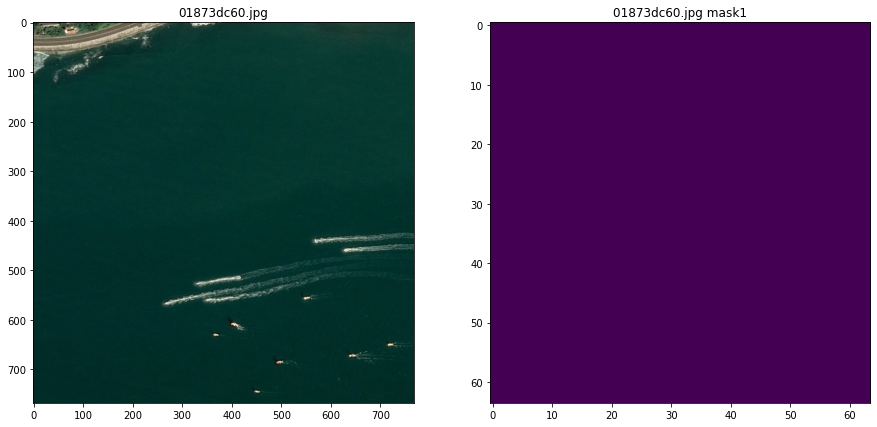

IndexError: index 108 is out of bounds for axis 0 with size 108

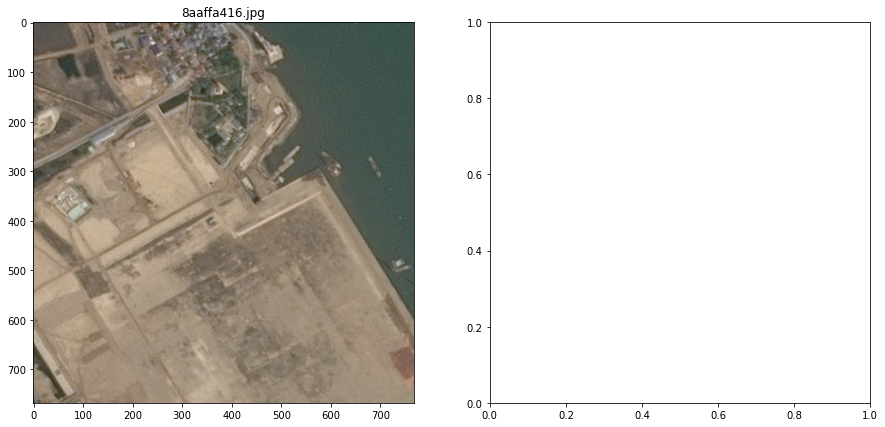

In [72]:
for k in [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]:
    cnt=0
#     print("Sample images with Class {} defect:".format(k))
    for i in train_data[train_data[f'Ship{k}']!=''][['ImageId',f'Ship{k}']].values:
        if cnt<3:
            fig, (ax1,ax2) = plt.subplots(nrows = 1,ncols = 2,figsize=(15, 7))
            img = io.imread('train_v2/' + str(i[0]))
            ax1.imshow(img)
            ax1.set_title(i[0])
            cnt+=1
            ax2.imshow(rle2mask(i[1]))
            ax2.set_title(i[0]+' mask'+str(k))
            plt.show()
    print('='*100,'\n')

In [75]:
from collections import Counter
a = Counter(imageNames)

In [76]:
print(a)

Counter({'01914baf2.jpg': 15, '02776139a.jpg': 15, '0368beab8.jpg': 15, '0445b541d.jpg': 15, '04a2c262a.jpg': 15, '076dd5527.jpg': 15, '0bbfa43b6.jpg': 15, '11f3bae66.jpg': 15, '16ccec57a.jpg': 15, '2053a78bd.jpg': 15, '2531669aa.jpg': 15, '327227baa.jpg': 15, '3f33be256.jpg': 15, '405b98f45.jpg': 15, '41bdd5164.jpg': 15, '4a3f658fc.jpg': 15, '4a4a6ccd2.jpg': 15, '4de149bd9.jpg': 15, '4ea5a8a2f.jpg': 15, '4fde25a38.jpg': 15, '5135c5b83.jpg': 15, '5151bc5d2.jpg': 15, '52deed575.jpg': 15, '54cdb132a.jpg': 15, '557cc16f1.jpg': 15, '55e23a0ba.jpg': 15, '56d23b600.jpg': 15, '5ba9557ef.jpg': 15, '5ce0761c8.jpg': 15, '60a1283c2.jpg': 15, '626beb313.jpg': 15, '670bae60b.jpg': 15, '6c06acaa5.jpg': 15, '6c4e3bea5.jpg': 15, '731d25545.jpg': 15, '73361816c.jpg': 15, '74150366c.jpg': 15, '7a7a0b578.jpg': 15, '7ed6fd5e5.jpg': 15, '8ccf7611e.jpg': 15, '8da0bfee5.jpg': 15, '96a40ad10.jpg': 15, '98f996411.jpg': 15, '99d10330c.jpg': 15, 'a8b38c84d.jpg': 15, 'accdf6c3e.jpg': 15, 'ad5092ca2.jpg': 15, 'b2c

In [79]:
keys = list(a.keys())

In [80]:
keys.sort()

In [82]:
checkCounts = []
for i in keys:
    val = a[i]
    for j in range(val):
        checkCounts.append(j+1)

In [84]:
print(len(checkCounts))

81723


In [87]:
finalDataFrame['Counts'] = checkCounts

In [88]:
finalDataFrame.head()

ImageId                                      EncodedPixels  Counts
0  000155de5.jpg  264661 17 265429 33 266197 33 266965 33 267733...       1
1  000194a2d.jpg  360486 1 361252 4 362019 5 362785 8 363552 10 ...       1
2  000194a2d.jpg  51834 9 52602 9 53370 9 54138 9 54906 9 55674 ...       2
3  000194a2d.jpg  198320 10 199088 10 199856 10 200624 10 201392...       3
4  000194a2d.jpg  55683 1 56451 1 57219 1 57987 1 58755 1 59523 ...       4

In [89]:
all_df = pd.pivot_table(finalDataFrame, values='EncodedPixels', index='ImageId',columns='Counts', aggfunc=np.sum).astype(str)

In [90]:
all_df = all_df.reset_index()
all_df.columns = ['ImageId','Ship1','Ship2','Ship3','Ship4',  'Ship5','Ship6','Ship7','Ship8','Ship9','Ship10','Ship11','Ship12','Ship13','Ship14','Ship15']
all_df.head()

ImageId                                              Ship1  \
0  000155de5.jpg  264661 17 265429 33 266197 33 266965 33 267733...   
1  000194a2d.jpg  360486 1 361252 4 362019 5 362785 8 363552 10 ...   
2  00021ddc3.jpg  108287 1 109054 3 109821 4 110588 5 111356 5 1...   
3  0002756f7.jpg  255784 2 256552 4 257319 7 258087 9 258854 12 ...   
4  00031f145.jpg  340363 1 341129 4 341896 6 342663 7 343429 10 ...   

                                               Ship2  \
0                                                nan   
1  51834 9 52602 9 53370 9 54138 9 54906 9 55674 ...   
2  101361 1 102128 3 102896 4 103663 6 104430 9 1...   
3  248878 1 249645 4 250413 6 251180 9 251948 10 ...   
4                                                nan   

                                               Ship3  \
0                                                nan   
1  198320 10 199088 10 199856 10 200624 10 201392...   
2  74441 3 75207 5 75975 5 76743 5 77511 5 78280 ...   
3                                                nan   
4                                                nan   

                                               Ship4  \
0                                                nan   
1  55683 1 56451 1 57219 1 57987 1 58755 1 59523 ...   
2  74444 4 75212 4 75980 4 76748 4 77517 3 78285 ...   
3                                                nan   
4                                                nan   

                                               Ship5  \
0                                                nan   
1  254389 9 255157 17 255925 17 256693 17 257461 ...   
2  150423 2 151190 3 151958 3 152726 4 153495 3 1...   
3                                                nan   
4                                                nan   

                                               Ship6  \
0                                                nan   
1                                                nan   
2  139644 2 140408 6 141174 9 141942 9 142711 6 1...   
3                                                nan   
4                                                nan   

                                               Ship7  \
0                                                nan   
1                                                nan   
2  75972 3 76738 5 77506 5 78274 5 79042 6 79811 ...   
3                                                nan   
4                                                nan   

                                               Ship8  \
0                                                nan   
1                                                nan   
2  86727 2 87493 4 88261 4 89030 3 89798 4 90566 ...   
3                                                nan   
4                                                nan   

                                               Ship9 Ship10 Ship11 Ship12  \
0                                                nan    nan    nan    nan   
1                                                nan    nan    nan    nan   
2  95225 2 95992 5 96760 7 97527 9 98294 9 99062 ...    nan    nan    nan   
3                                                nan    nan    nan    nan   
4                                                nan    nan    nan    nan   

  Ship13 Ship14 Ship15  
0    nan    nan    nan  
1    nan    nan    nan  
2    nan    nan    nan  
3    nan    nan    nan  
4    nan    nan    nan

In [91]:
all_df.to_csv("prep_data.csv", index=False)

In [92]:
data = pd.read_csv("prep_data.csv")
data.head()

ImageId                                              Ship1  \
0  000155de5.jpg  264661 17 265429 33 266197 33 266965 33 267733...   
1  000194a2d.jpg  360486 1 361252 4 362019 5 362785 8 363552 10 ...   
2  00021ddc3.jpg  108287 1 109054 3 109821 4 110588 5 111356 5 1...   
3  0002756f7.jpg  255784 2 256552 4 257319 7 258087 9 258854 12 ...   
4  00031f145.jpg  340363 1 341129 4 341896 6 342663 7 343429 10 ...   

                                               Ship2  \
0                                                NaN   
1  51834 9 52602 9 53370 9 54138 9 54906 9 55674 ...   
2  101361 1 102128 3 102896 4 103663 6 104430 9 1...   
3  248878 1 249645 4 250413 6 251180 9 251948 10 ...   
4                                                NaN   

                                               Ship3  \
0                                                NaN   
1  198320 10 199088 10 199856 10 200624 10 201392...   
2  74441 3 75207 5 75975 5 76743 5 77511 5 78280 ...   
3                                                NaN   
4                                                NaN   

                                               Ship4  \
0                                                NaN   
1  55683 1 56451 1 57219 1 57987 1 58755 1 59523 ...   
2  74444 4 75212 4 75980 4 76748 4 77517 3 78285 ...   
3                                                NaN   
4                                                NaN   

                                               Ship5  \
0                                                NaN   
1  254389 9 255157 17 255925 17 256693 17 257461 ...   
2  150423 2 151190 3 151958 3 152726 4 153495 3 1...   
3                                                NaN   
4                                                NaN   

                                               Ship6  \
0                                                NaN   
1                                                NaN   
2  139644 2 140408 6 141174 9 141942 9 142711 6 1...   
3                                                NaN   
4                                                NaN   

                                               Ship7  \
0                                                NaN   
1                                                NaN   
2  75972 3 76738 5 77506 5 78274 5 79042 6 79811 ...   
3                                                NaN   
4                                                NaN   

                                               Ship8  \
0                                                NaN   
1                                                NaN   
2  86727 2 87493 4 88261 4 89030 3 89798 4 90566 ...   
3                                                NaN   
4                                                NaN   

                                               Ship9 Ship10 Ship11 Ship12  \
0                                                NaN    NaN    NaN    NaN   
1                                                NaN    NaN    NaN    NaN   
2  95225 2 95992 5 96760 7 97527 9 98294 9 99062 ...    NaN    NaN    NaN   
3                                                NaN    NaN    NaN    NaN   
4                                                NaN    NaN    NaN    NaN   

  Ship13 Ship14 Ship15  
0    NaN    NaN    NaN  
1    NaN    NaN    NaN  
2    NaN    NaN    NaN  
3    NaN    NaN    NaN  
4    NaN    NaN    NaN

In [93]:
data.fillna('', inplace=True)
data.head()

ImageId                                              Ship1  \
0  000155de5.jpg  264661 17 265429 33 266197 33 266965 33 267733...   
1  000194a2d.jpg  360486 1 361252 4 362019 5 362785 8 363552 10 ...   
2  00021ddc3.jpg  108287 1 109054 3 109821 4 110588 5 111356 5 1...   
3  0002756f7.jpg  255784 2 256552 4 257319 7 258087 9 258854 12 ...   
4  00031f145.jpg  340363 1 341129 4 341896 6 342663 7 343429 10 ...   

                                               Ship2  \
0                                                      
1  51834 9 52602 9 53370 9 54138 9 54906 9 55674 ...   
2  101361 1 102128 3 102896 4 103663 6 104430 9 1...   
3  248878 1 249645 4 250413 6 251180 9 251948 10 ...   
4                                                      

                                               Ship3  \
0                                                      
1  198320 10 199088 10 199856 10 200624 10 201392...   
2  74441 3 75207 5 75975 5 76743 5 77511 5 78280 ...   
3                                                      
4                                                      

                                               Ship4  \
0                                                      
1  55683 1 56451 1 57219 1 57987 1 58755 1 59523 ...   
2  74444 4 75212 4 75980 4 76748 4 77517 3 78285 ...   
3                                                      
4                                                      

                                               Ship5  \
0                                                      
1  254389 9 255157 17 255925 17 256693 17 257461 ...   
2  150423 2 151190 3 151958 3 152726 4 153495 3 1...   
3                                                      
4                                                      

                                               Ship6  \
0                                                      
1                                                      
2  139644 2 140408 6 141174 9 141942 9 142711 6 1...   
3                                                      
4                                                      

                                               Ship7  \
0                                                      
1                                                      
2  75972 3 76738 5 77506 5 78274 5 79042 6 79811 ...   
3                                                      
4                                                      

                                               Ship8  \
0                                                      
1                                                      
2  86727 2 87493 4 88261 4 89030 3 89798 4 90566 ...   
3                                                      
4                                                      

                                               Ship9 Ship10 Ship11 Ship12  \
0                                                                           
1                                                                           
2  95225 2 95992 5 96760 7 97527 9 98294 9 99062 ...                        
3                                                                           
4                                                                           

  Ship13 Ship14 Ship15  
0                       
1                       
2                       
3                       
4

In [94]:
from sklearn.model_selection import train_test_split
train_data, cv_data = train_test_split(data, test_size=0.15, random_state=42)
print(train_data.shape)
print(cv_data.shape)

(36172, 16)
(6384, 16)


In [101]:
def rle2mask(rle):
    # CONVERT RLE TO MASK 
    if (pd.isnull(rle))|(rle==''): 
        return np.zeros((128,800) ,dtype=np.uint8)
    
    height= 768
    width = 768
    mask= np.zeros( width*height ,dtype=np.uint8)

    array = np.asarray([int(x) for x in rle.split()])
    starts = array[0::2]-1
    lengths = array[1::2]    
    for index, start in enumerate(starts):
        mask[int(start):int(start+lengths[index])] = 1
    
    return mask.reshape( (height,width), order='F' )[::2,::2]


# to convert masks to run length encoded values
def mask2rle(img):
    '''
    img: numpy array containing ones and zeros as pixel values, 1 - mask, 0 - background
    Returns String run length ecoded pixels 
    '''
    pixels= img.T.flatten() # Convert nd-array to 1d-array (numbering of pixels is from top to bottom)
    pixels = np.concatenate([[0], pixels, [0]]) # Adding zeros at the start and end so that if there's mask at the first/last pixel, it gets detected.
    runs = np.where(pixels[1:] != pixels[:-1])[0] + 1 # Detect all changing pixels (where pixel values changes, either 0 -> 1 or 1 -> 0)
    
    # To get RLE, we need start pixels and run lengths
    # Start pixels are the pixels where change 0 -> 1 occurs, i.e. pixels at even indices
    # Run length is the pixel distance between two consecutive changing pixels. So, run lengths = odd indices - even indices
    runs[1::2] -= runs[::2] 

    return ' '.join(str(x) for x in runs)

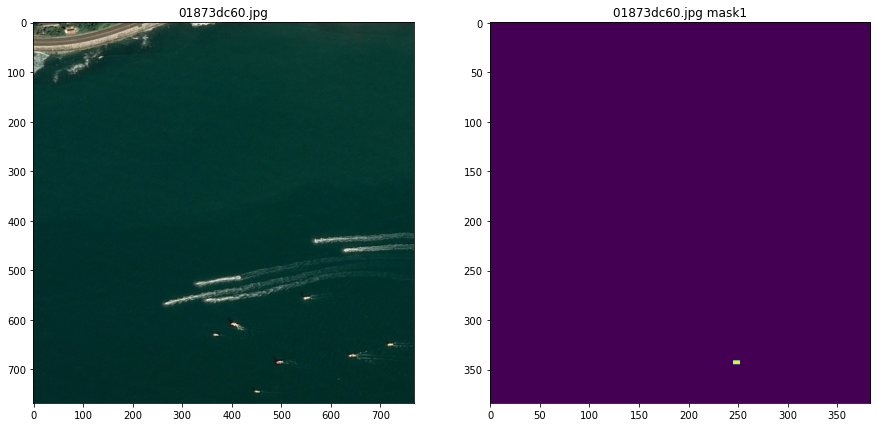

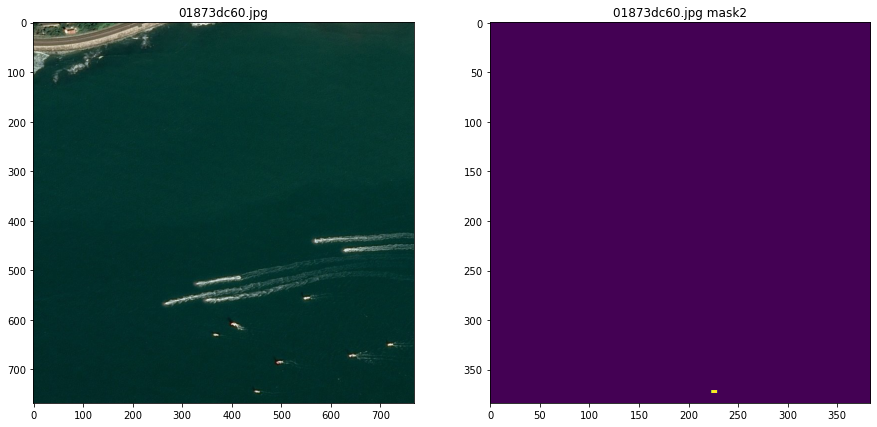

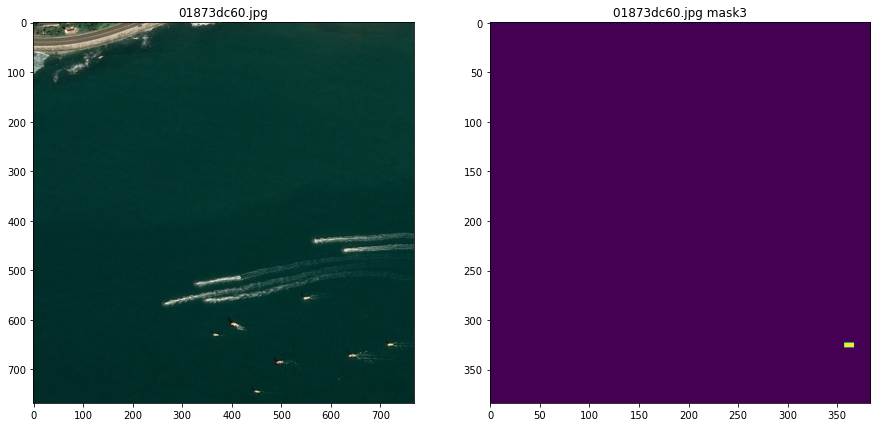

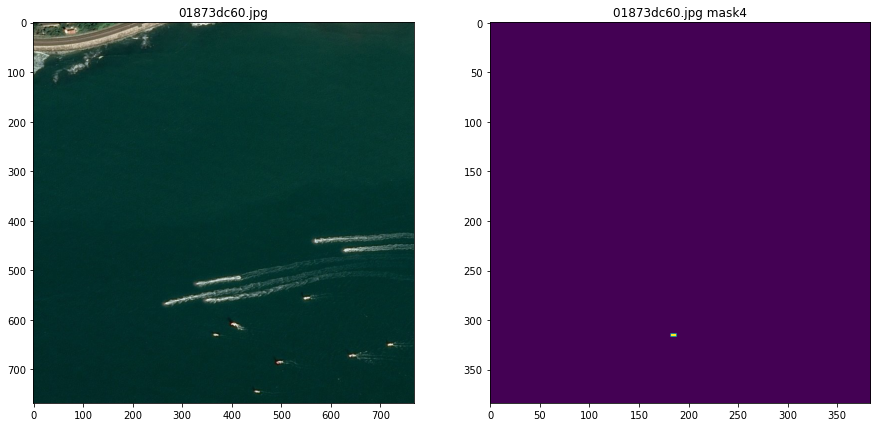

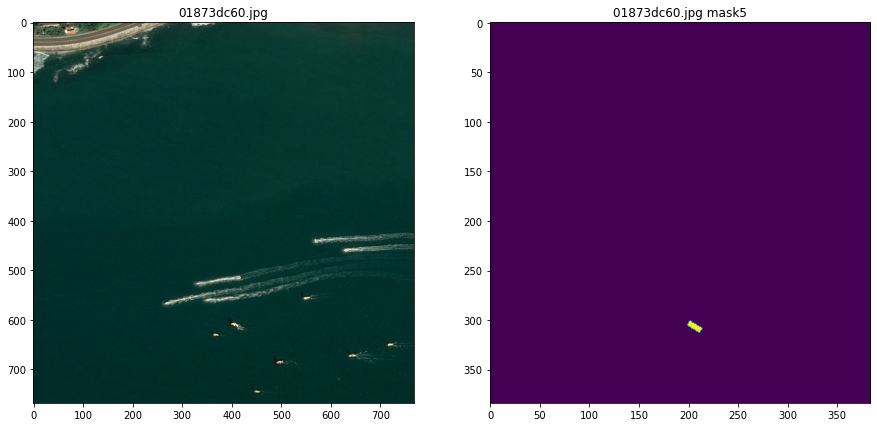

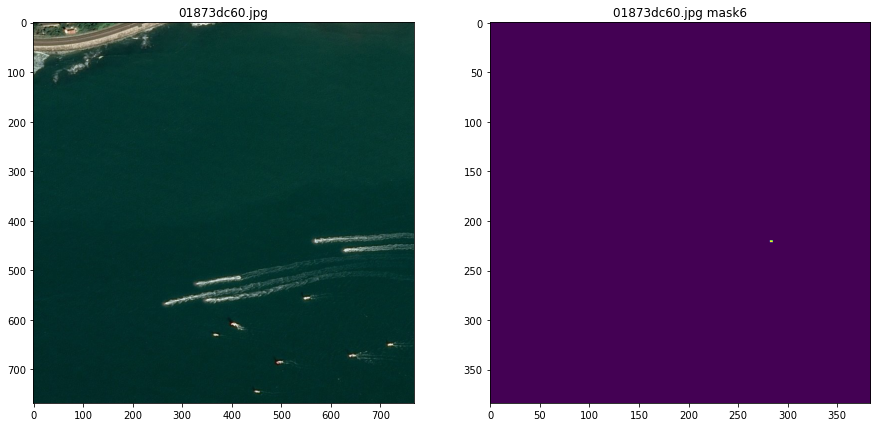

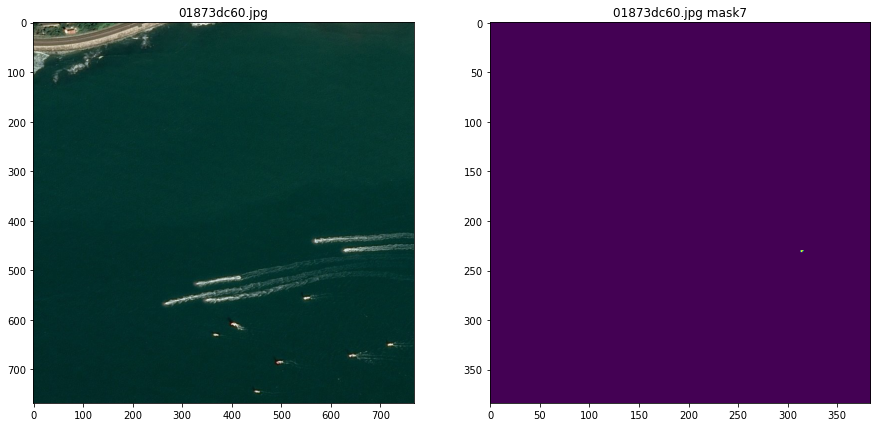

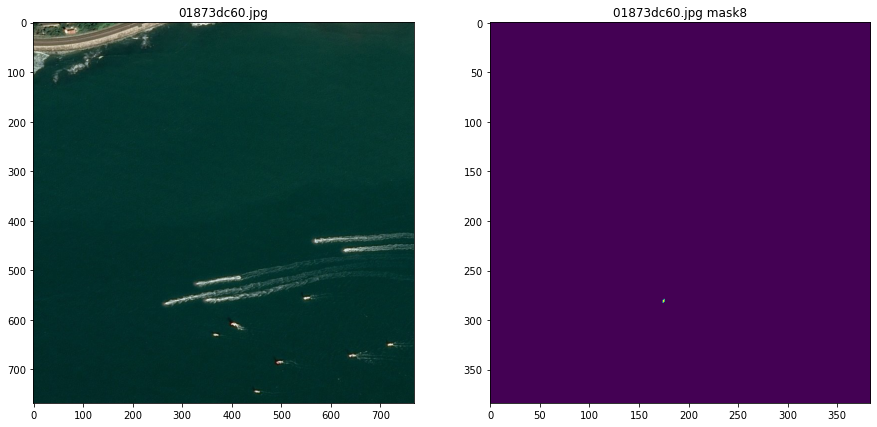

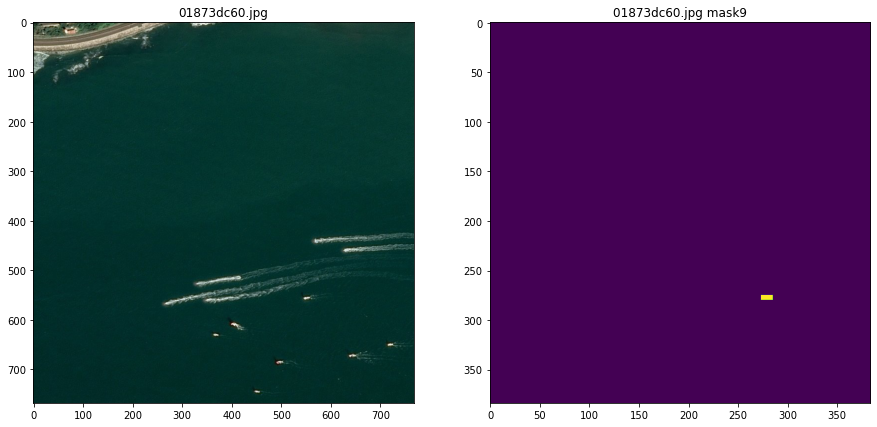

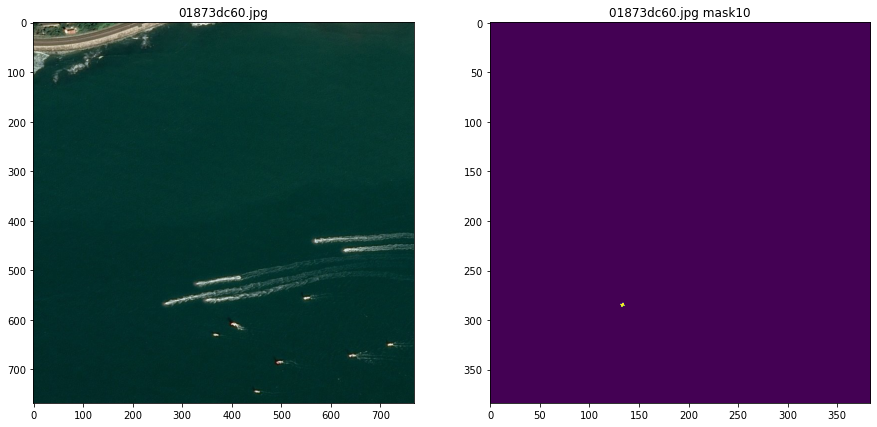

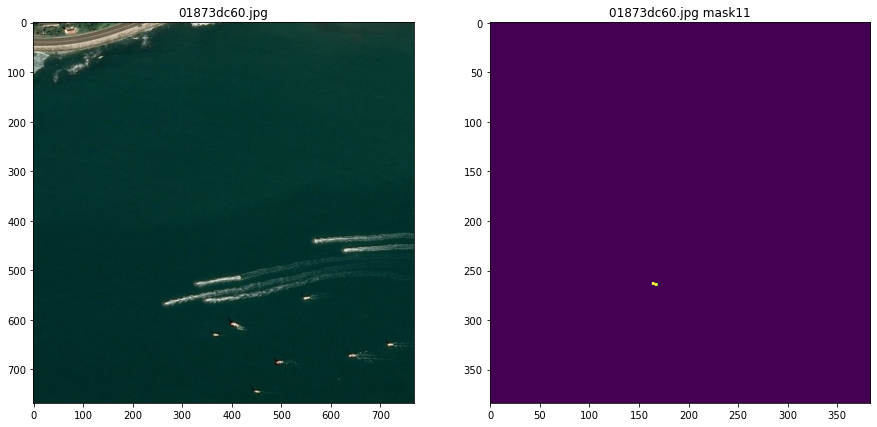

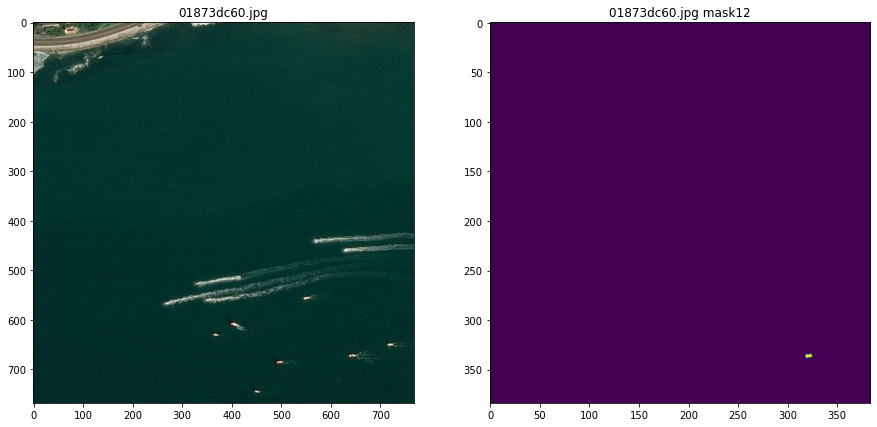

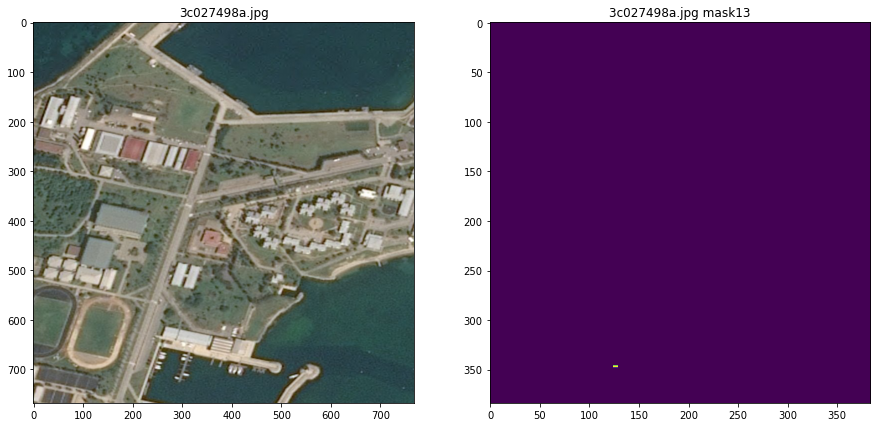

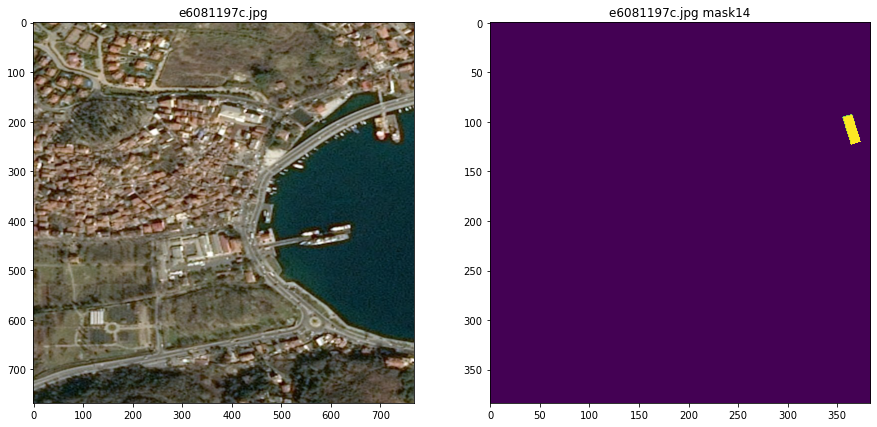

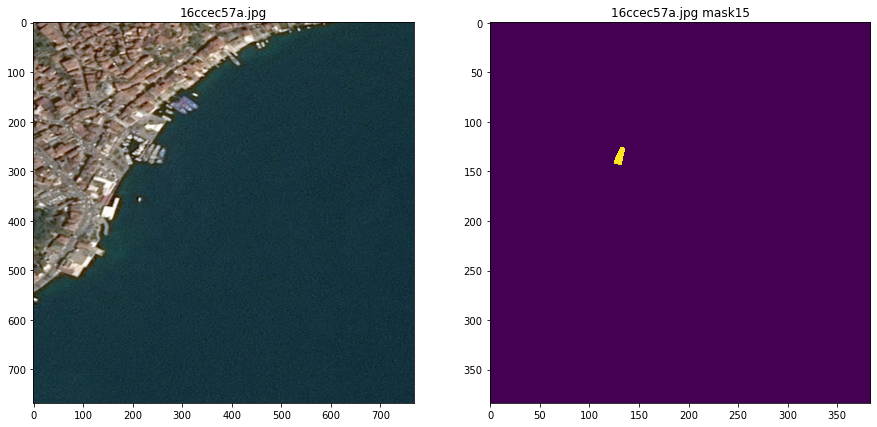

In [102]:
for k in [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]:
    cnt=0
#     print("Sample images with Class {} defect:".format(k))
    for i in train_data[train_data[f'Ship{k}']!=''][['ImageId',f'Ship{k}']].values:
#         print(i)
#         break
        if cnt<3:
            fig, (ax1,ax2) = plt.subplots(nrows = 1,ncols = 2,figsize=(15, 7))
            img = io.imread('train_v2/' + str(i[0]))
            ax1.imshow(img)
            ax1.set_title(i[0])
            cnt+=1
            ax2.imshow(rle2mask(i[1]))
            ax2.set_title(i[0]+' mask'+str(k))
            plt.show()
            break
    print('='*100,'\n')